In [1]:
library(tidyverse)
library(ggplot2)
deposit <- read_csv("../_build/data/marketing.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  age = col_double(),
  marital = col_character(),
  education = col_character(),
  default = col_character(),
  housing = col_character(),
  loan = col_character(),
  contact = col_character(),
  duration = col_double(),
  campaign = col_double(),
  previous = col_double(),
  poutcome = col_character(),
  subscription = col_double()
)


# Why Not Linear Regression?

At this point, a natural question might be why one cannot use linear regression to model categorical outcomes. To understand why, let's look at an example. We have a data set related to a telephone marketing campaign of a Portuguese banking institution. Suppose we would like to model the likelihood that a phone call recipient will make a term deposit at the bank. The data is saved in a data frame called `deposit`, and the first few observations are shown below:

In [2]:
head(deposit)

age,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,subscription
30,married,primary,no,no,no,cellular,79,1,0,unknown,0
33,married,secondary,no,yes,yes,cellular,220,1,4,failure,0
35,single,tertiary,no,yes,no,cellular,185,1,1,failure,0
30,married,tertiary,no,yes,yes,unknown,199,4,0,unknown,0
59,married,secondary,no,yes,no,unknown,226,1,0,unknown,0
35,single,tertiary,no,no,no,cellular,141,2,3,failure,0


These variables are defined as follows:

+ `age`: The age of the person contacted.
+ `marital`: The marital status of the person contacted. 
+ `education`: The education level of the person contacted. 
+ `default`: Whether the person contacted has credit in default.
+ `housing`: Whether the person contacted has a housing loan.
+ `loan`: Whether the person contacted has a personal loan.
+ `contact`: How the person was contacted (`cellular` or `telephone`).
+ `duration`: The duration of the contact, in seconds.
+ `campaign`: The number of contacts performed during this campaign for this client.
+ `previous`: The number of contacts performed before this campaign for this client.
+ `poutcome`: The outcome of the previous marketing campaign (`failure`, `nonexistent`, or `success`).
+ `subscription`: Whether the person contacted made a term deposit (`1` if the person made a deposit and `0` if not).

Let's try using linear regression to model `subscription` as a function of `duration`:

In [3]:
depositLinear <- lm(subscription ~ duration, data = deposit)
summary(depositLinear)


Call:
lm(formula = subscription ~ duration, data = deposit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47629 -0.11329 -0.05758 -0.01963  1.00009 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.488e-02  6.203e-03  -2.399   0.0165 *  
duration     4.930e-04  1.675e-05  29.436   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2926 on 4519 degrees of freedom
Multiple R-squared:  0.1609,	Adjusted R-squared:  0.1607 
F-statistic: 866.5 on 1 and 4519 DF,  p-value: < 2.2e-16


Based on this output, our estimated regression equation is:

$$predicted \;subscription = \hat{y} = -0.01488 + 0.0004930(duration)$$

If we plot this line on top of our data, we can start to see the problem:

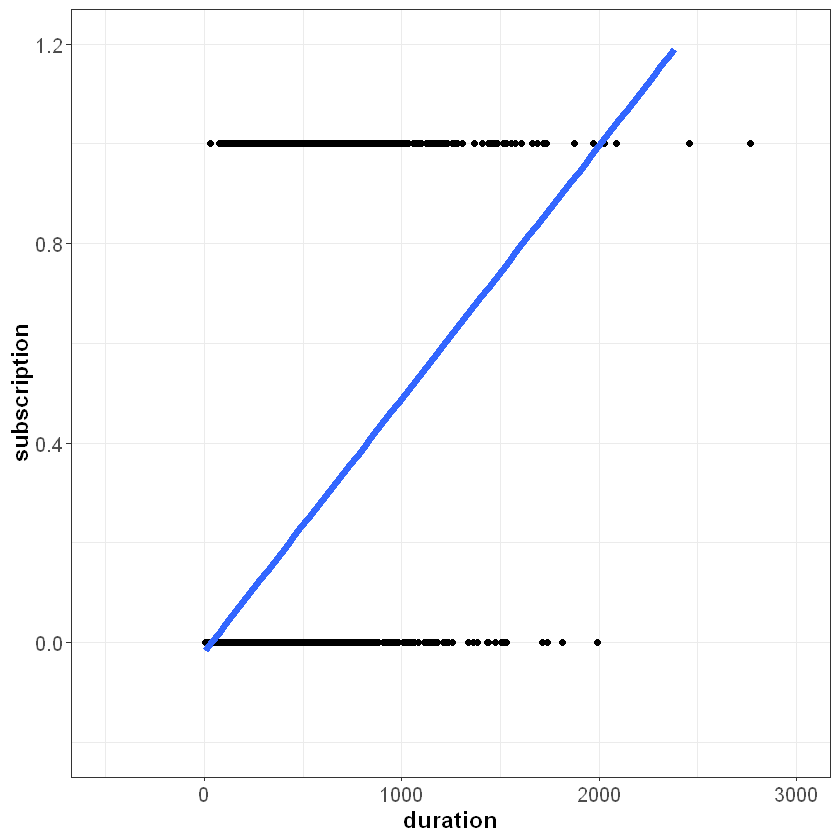

In [4]:
suppressWarnings(print(ggplot(deposit, aes(x=duration, y=subscription)) + geom_point()  +
  geom_smooth(method='lm', se=F,size=2) + theme_bw() +
  xlim(-500, 3000) + ylim(-0.2, 1.2) +
  theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))))

Our independent variable `subscription` can only take on two possible values, `0` and `1`. However, the line we fit is not bounded between zero and one. If `duration` equals 2,500 seconds, for example, the model would predict a value greater than one:

$$\begin{aligned}predicted \;subscription = \hat{y} & \approx -0.01488 + 0.0004930(2500) \\ & \approx -0.01488 + 1.2325 \\ & \approx 1.2176\end{aligned}$$

A negative value of `duration` does not make sense in this context, but in principle the same problem applies in the opposite direction - for small values of $X$, the linear model might predict outcomes less than zero. To overcome this issue, logistic regression models the dependent variable $Y$ according to the logistic function, which is bounded between zero and one.